In [2]:
from offset_tensor import OffsetTensor
import imageio.v3 as iio
import numpy as np
import itertools
import fast1dkmeans

from wavelet import Wavelet
from periodic.wave import wavedec_period

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='CR', ylabel='SSIM_Uniform'>

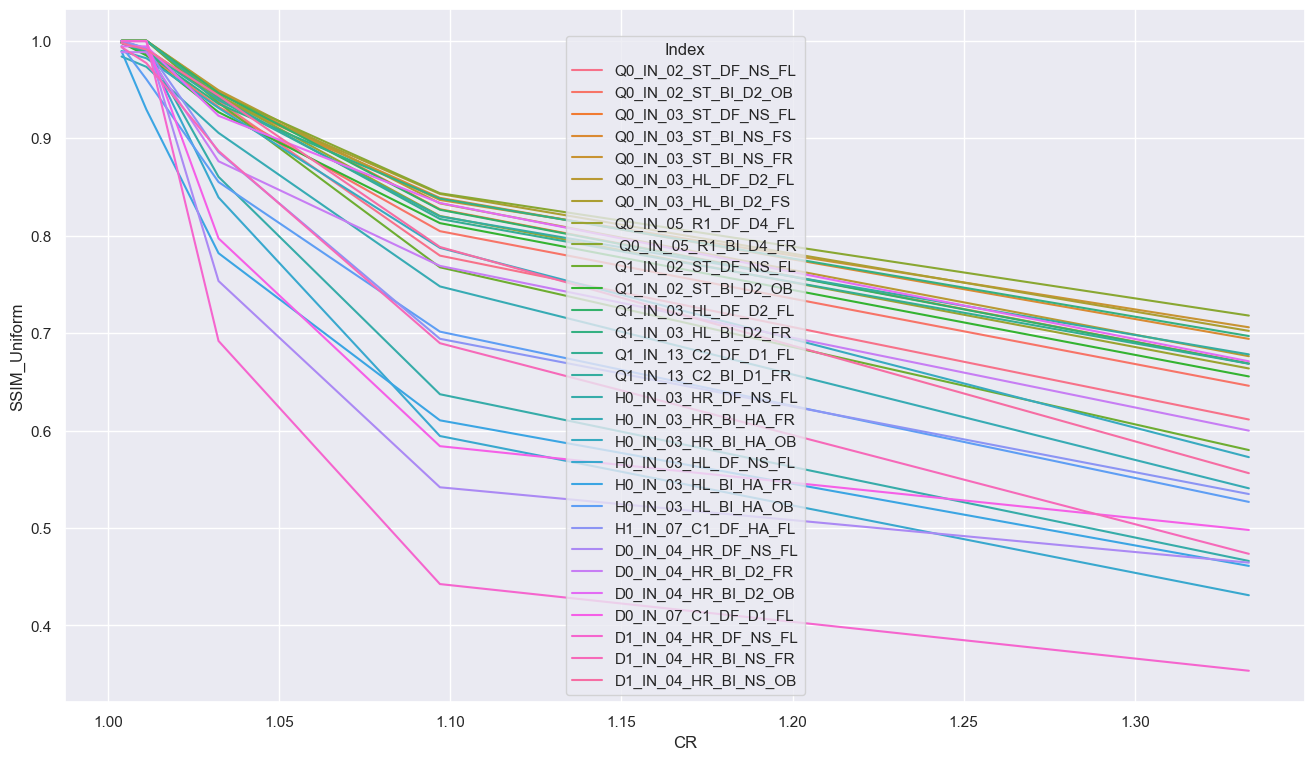

In [9]:
df = pd.read_csv('results.csv')[["Index", "Estimated_CR", "SSIM_Uniform"]]
df['CR'] = 1 / (1 - df['Estimated_CR'])
sns.set_theme(rc={'figure.figsize':(16, 9)})
sns.lineplot(data=df, x='CR', y='SSIM_Uniform', hue='Index')
#plt.legend([],[], frameon=False)

In [6]:
#data = OffsetTensor(iio.imread('test/lenna.bmp'), np.array([0, 0]))
data = OffsetTensor(28. * np.array([[1, 2, 3, 4, 5, 6], [2, 3, 4, 5, 6, 7], [3, 4, 5, 6, 7, 8], [4, 5, 6, 7, 8, 9], [5, 6, 7, 8, 9, 10], [6, 7, 8, 9, 10, 11]]), np.array([0,0]))

M = np.array([[


1, -1], [1,1]])

h = OffsetTensor(np.array([[0.25, 0.5, 0.25]]), np.array([0, -1]))
g = (OffsetTensor(np.array([[-0.125, -0.25, 0.75, -0.25, -0.125]]), np.array([0, -1])),)
hdual = OffsetTensor(np.array([[-0.125, 0.25, 0.75, 0.25, -0.125]]), np.array([0, -2]))
gdual = (OffsetTensor(np.array([[-0.25, 0.5, -0.25]]), np.array([0, 0])),)



w = Wavelet(h, g, hdual, gdual, M, np.abs(np.linalg.det(M)))

#ci_ = wavedec(data, 1, w)
ci = wavedec_period(data, w, 3)
#clamp(ci)


In [8]:
n_cluster = 256
coef = ci
flat_coef = np.array(list(coef[0]) + list(itertools.chain(*itertools.chain(*coef[1:]))))

In [13]:
flat_coef = np.array(list(coef[0]) + list(itertools.chain(*itertools.chain(*coef[1:]))))
n_min = np.min(flat_coef)
n_max = np.max(flat_coef)
quantized = np.clip(np.round((flat_coef - n_min) / n_max * (n_cluster - 1)),0, n_cluster - 1).astype(int)

In [17]:
quantized
flat_coef = np.array(list(coef[0]) + list(itertools.chain(*itertools.chain(*coef[1:]))))

flat_restored = (quantized * (n_cluster - 1) / n_max) + n_min
restored = list()
idx = 0
restored.append(flat_restored[:coef[0].size])
idx = coef[0].size
for c in coef[1:]:
    restored.append([])
    for cc in c:
        restored[-1].append(flat_restored[idx:idx + cc.size])
        idx += cc.size

In [25]:
flat_restored = (quantized * n_max / (n_cluster - 1)) + n_min

In [26]:
flat_restored

array([ 21.02745098, 160.58823529, 148.20784314, 131.3254902 ,
       147.08235294, 245.        , 121.19607843, 103.18823529,
       -20.61568627, -20.61568627, -17.23921569, -17.23921569,
        -7.10980392,  -7.10980392,  45.78823529,  45.78823529,
         8.64705882,   8.64705882,  33.40784314,   5.27058824,
        -4.85882353,  -4.85882353,  18.77647059,  -8.23529412,
        -4.85882353,  -4.85882353,  18.77647059,  -8.23529412,
        36.78431373,  36.78431373,  61.54509804,  33.40784314,
        -0.35686275,  -0.35686275,  42.41176471,  14.2745098 ,
        -0.35686275,  -0.35686275, -42.        , -13.8627451 ,
        -0.35686275,  -0.35686275,  42.41176471,  14.2745098 ,
        -0.35686275,  -0.35686275, -42.        , -13.8627451 ,
        -0.35686275,  -0.35686275,  42.41176471,  14.2745098 ,
        -0.35686275,  -0.35686275, -42.        , -13.8627451 ,
        -0.35686275,  -0.35686275,  42.41176471,  14.2745098 ,
        -0.35686275,  -0.35686275, -42.        , -13.86

In [24]:
flat_coef

array([ 21.  , 161.  , 148.75, 131.25, 147.  , 287.  , 120.75, 103.25,
       -21.  , -21.  , -17.5 , -17.5 ,  -7.  ,  -7.  ,  45.5 ,  45.5 ,
         8.75,   8.75,  33.25,   5.25,  -5.25,  -5.25,  19.25,  -8.75,
        -5.25,  -5.25,  19.25,  -8.75,  36.75,  36.75,  61.25,  33.25,
         0.  ,   0.  ,  42.  ,  14.  ,   0.  ,   0.  , -42.  , -14.  ,
         0.  ,   0.  ,  42.  ,  14.  ,   0.  ,   0.  , -42.  , -14.  ,
         0.  ,   0.  ,  42.  ,  14.  ,   0.  ,   0.  , -42.  , -14.  ,
         0.  ,   0.  ,  42.  ,  14.  ,   0.  ,   0.  , -42.  , -14.  ])

In [11]:
flat_restored = centroids[clusters]

In [12]:
restored = list()
idx = 0
restored.append(flat_restored[:ci[0].size])
idx = ci[0].size

In [13]:
for c in ci[1:]:
    restored.append([])
    for cc in c:
        restored[-1].append(flat_restored[idx:idx+cc.size])
        idx += cc.size

In [14]:
restored

[array([162.315207]),
 [array([0.23522691])],
 [array([10.42569923])],
 [array([ -4.796521  , -10.69530487])],
 [array([-4.796521, -4.796521])],
 [array([10.42569923, 41.72211914,  0.23522691])],
 [array([-10.69530487,  35.86816406, -23.33789062, -23.33789062,
         -10.69530487])],
 [array([ 82.6875    ,  10.42569923,  -4.796521  ,  82.6875    ,
          10.42569923,  47.0625    , -23.33789062, -41.934375  ,
          47.0625    , -23.33789062])],
 [array([ 47.0625    ,  47.0625    ,  47.0625    ,  47.0625    ,
          47.0625    , -36.75      , -36.75      , -36.75      ,
         -36.75      , -10.69530487, -10.69530487, -10.69530487,
         -10.69530487, -10.69530487])],
 [array([ 22.75      ,  35.86816406,  63.        ,  22.75      ,
          35.86816406,  63.        ,  22.75      ,  35.86816406,
          63.        , -15.75      ,  -4.796521  ,  22.75      ,
         -15.75      ,  -4.796521  ,  22.75      , -15.75      ,
          -4.796521  ,  22.75      , -15.75     